In [8]:
# 코랩에서 한글 그래프 적용하려면(세션 다시 시작)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
%pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 21.4 MB/s eta 0:00:00


In [3]:
%pip install python-mecab-ko

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 579.6/579.6 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 20.9 MB/s eta 0:00:00


In [9]:
# 한글 말뭉치
from konlpy.corpus import kolaw
#C:\Users\Admin\anaconda3\envs\ml-dl-nlp\Lib\site-packages\konlpy\data\corpus\kolaw
#data = kolaw.open('constitution.txt').readlines() #한 줄씩 list로 반환
data = kolaw.open('constitution.txt').read()
print('글자수: ', len(data))

글자수:  18884


In [10]:
from mecab import MeCab
analyzer = MeCab()
noun_list = [word for word, tag in analyzer.pos(data) if tag in ('NNG', 'NNP')]
data_noun = ' '.join(noun_list)
print(data_noun[:20])

대한민국 헌법 역사 전통 국민 운동 


(numpy.ndarray, (1124, 720, 3))

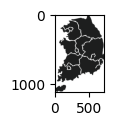

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
img = Image.open('/content/drive/MyDrive/Colab/nlp_ex/data/south_korea.png').convert('RGB')
mask = np.array(img)
plt.figure(figsize=(2,1))
plt.imshow(mask)
type(mask), mask.shape

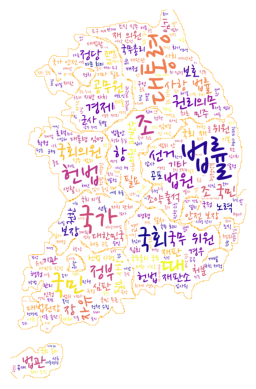

In [4]:
from wordcloud import WordCloud
wordcloud = WordCloud(
    font_path='/content/drive/MyDrive/Colab/nlp_ex/data/NanumPenScript-Regular.ttf',
    background_color='white',
    width=800, height=400,
    max_words = 300,
    colormap='plasma',
    mask=mask,
    contour_color='orange',
    contour_width=1
)
wordcloud.generate(data_noun)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [6]:
wordcloud.to_file('/content/drive/MyDrive/Colab/nlp_ex/data/korea.png')

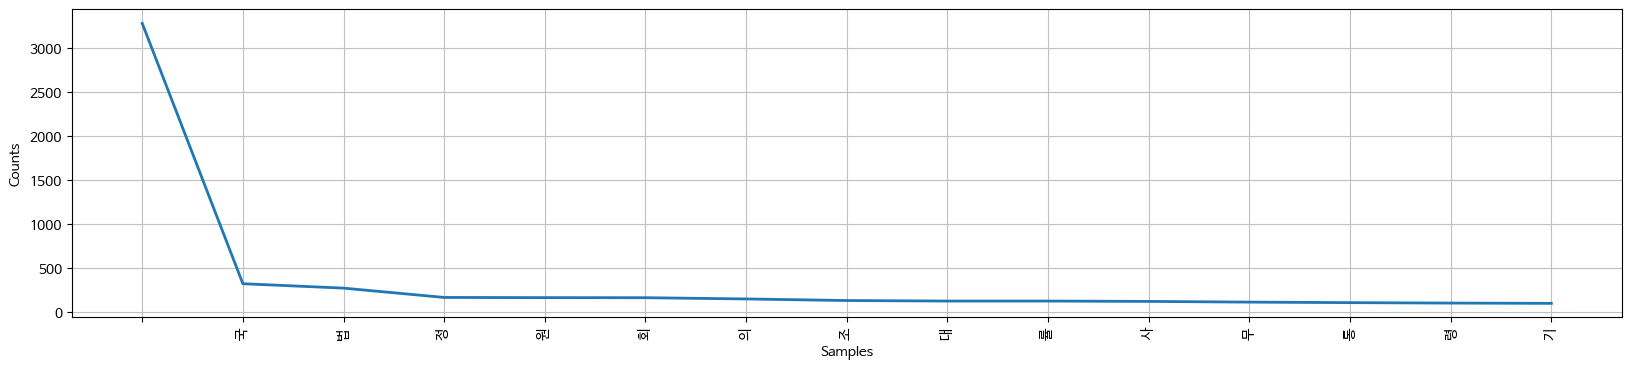

In [12]:
import nltk
plt.figure(figsize=(20,4))
data_text = nltk.Text(data_noun)
# plt.rc('font', family='Malgun Gothic') 윈도우즈에서
plt.rc('font', family='NanumBarunGothic') #Colab에서
data_text.plot(15)
plt.show()